# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
! pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#base URL for API data
url_base = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="
url_base2 = "&q="
for_request = url_base + api_key + url_base2

# Looking at sample to determine the dicts and licts in the json file
requests.get(for_request +"republic").json()


{'coord': {'lon': -118.74, 'lat': 48.65},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10d'}],
 'base': 'stations',
 'main': {'temp': 40.39,
  'pressure': 1009,
  'humidity': 81,
  'temp_min': 32,
  'temp_max': 44.01},
 'visibility': 16093,
 'wind': {'speed': 9.17, 'deg': 180},
 'rain': {'1h': 0.76},
 'clouds': {'all': 90},
 'dt': 1554579097,
 'sys': {'type': 1,
  'id': 5207,
  'message': 0.0038,
  'country': 'US',
  'sunrise': 1554556947,
  'sunset': 1554604314},
 'id': 5808201,
 'name': 'Republic',
 'cod': 200}

In [5]:
data_cities = []
count = 1
# Enumerate cities
for x in (cities):
    print(f"Processing Record {count} of Set 1 | {x}")
    count += 1 
    data_city = requests.get(for_request + x).json()
    try:
        data_cities.append({"City":x, 
                        "Latitude":data_city["coord"]["lat"],
                        "Temperature":data_city["main"]["temp_max"],
                        "Humidity":data_city["main"]["humidity"],
                        "Cloudiness":data_city["clouds"]["all"],
                        "Wind Speed":data_city["wind"]["speed"],
                       })
    except:
        pass



Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | banda aceh
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | hilo
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | araouane
Processing Record 7 of Set 1 | narsaq
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | xingyi
Processing Record 10 of Set 1 | khatanga
Processing Record 11 of Set 1 | tsihombe
Processing Record 12 of Set 1 | payo
Processing Record 13 of Set 1 | mullaitivu
Processing Record 14 of Set 1 | teruel
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | san rafael
Processing Record 18 of Set 1 | baykit
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | upernavik
Processing Record 21 of Set 1 | goderich
Processing Record 22 of Set 1 | mar del plata
Processing Record 23 of Set 1 | castro
Processing Record 24 of Set 1 | taolanaro
Processing Record 25 of

Processing Record 198 of Set 1 | isangel
Processing Record 199 of Set 1 | honningsvag
Processing Record 200 of Set 1 | kamenka
Processing Record 201 of Set 1 | poum
Processing Record 202 of Set 1 | vardo
Processing Record 203 of Set 1 | abha
Processing Record 204 of Set 1 | mount isa
Processing Record 205 of Set 1 | yorosso
Processing Record 206 of Set 1 | hamilton
Processing Record 207 of Set 1 | pangnirtung
Processing Record 208 of Set 1 | port blair
Processing Record 209 of Set 1 | port macquarie
Processing Record 210 of Set 1 | flinders
Processing Record 211 of Set 1 | alizai
Processing Record 212 of Set 1 | koulikoro
Processing Record 213 of Set 1 | jalu
Processing Record 214 of Set 1 | alyangula
Processing Record 215 of Set 1 | hambantota
Processing Record 216 of Set 1 | kyren
Processing Record 217 of Set 1 | laguna
Processing Record 218 of Set 1 | kem
Processing Record 219 of Set 1 | antofagasta
Processing Record 220 of Set 1 | tautira
Processing Record 221 of Set 1 | quang ngai

Processing Record 392 of Set 1 | kaoma
Processing Record 393 of Set 1 | rio gallegos
Processing Record 394 of Set 1 | eureka
Processing Record 395 of Set 1 | chagda
Processing Record 396 of Set 1 | nishihara
Processing Record 397 of Set 1 | hami
Processing Record 398 of Set 1 | kuantan
Processing Record 399 of Set 1 | salalah
Processing Record 400 of Set 1 | chara
Processing Record 401 of Set 1 | puerto quijarro
Processing Record 402 of Set 1 | sahrak
Processing Record 403 of Set 1 | sandwick
Processing Record 404 of Set 1 | husavik
Processing Record 405 of Set 1 | amahai
Processing Record 406 of Set 1 | sturgeon bay
Processing Record 407 of Set 1 | arnoldstein
Processing Record 408 of Set 1 | giyon
Processing Record 409 of Set 1 | fortuna
Processing Record 410 of Set 1 | raudeberg
Processing Record 411 of Set 1 | belushya guba
Processing Record 412 of Set 1 | mikhaylovsk
Processing Record 413 of Set 1 | hovd
Processing Record 414 of Set 1 | victoria
Processing Record 415 of Set 1 | sz

Processing Record 587 of Set 1 | kenora
Processing Record 588 of Set 1 | iqaluit
Processing Record 589 of Set 1 | aldan
Processing Record 590 of Set 1 | lalganj
Processing Record 591 of Set 1 | chester
Processing Record 592 of Set 1 | san juan del sur
Processing Record 593 of Set 1 | algeciras
Processing Record 594 of Set 1 | ahuimanu
Processing Record 595 of Set 1 | mancio lima
Processing Record 596 of Set 1 | alekseyevka
Processing Record 597 of Set 1 | orsk
Processing Record 598 of Set 1 | rocha
Processing Record 599 of Set 1 | maghama
Processing Record 600 of Set 1 | novikovo
Processing Record 601 of Set 1 | gorom-gorom
Processing Record 602 of Set 1 | wichita falls
Processing Record 603 of Set 1 | romny
Processing Record 604 of Set 1 | guerrero negro
Processing Record 605 of Set 1 | kurumkan
Processing Record 606 of Set 1 | warqla
Processing Record 607 of Set 1 | biedenkopf
Processing Record 608 of Set 1 | katima mulilo


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#DataFrame
data_df = pd.DataFrame(data_cities)
data_df.head()
data_df.to_csv("./city_data.csv", index = None, header = True)
#Save as csv

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

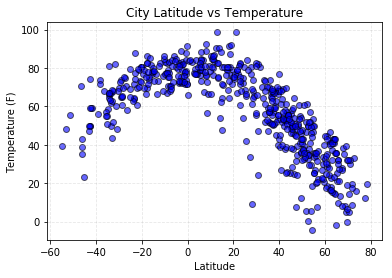

R-sq: 0.4160678106368264


LinregressResult(slope=-0.42632271068379385, intercept=67.13443118191468, rvalue=-0.6450331856864625, pvalue=4.392331431883111e-65, stderr=0.021734053818081786)

In [15]:
#Scatter Plot
plt.scatter(data_df["Latitude"],data_df["Temperature"], marker="o", color="blue", edgecolors="black", alpha=0.6)
plt.title("City Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(linestyle="--", alpha=0.3)
plt.savefig("Output/Temp_Latitude.png")
plt.show()

#LinearReg
slope_tem, intercept_tem, r_value_tem, p_value_tem, std_err_tem = stats.linregress(data_df["Latitude"],data_df["Temperature"])
print(f"R-sq: {r_value_tem*r_value_tem}")
stats.linregress(data_df["Latitude"],data_df["Temperature"])

#### Latitude vs. Humidity Plot

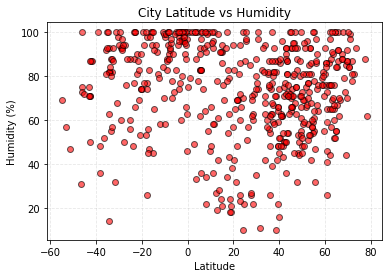

R-sq: 0.015089531256857898


LinregressResult(slope=-0.07928764373999021, intercept=75.44850225814443, rvalue=-0.12283945317713645, pvalue=0.004182439432851286, stderr=0.02756570690380741)

In [14]:
#Scatter Plot
plt.scatter(data_df["Latitude"],data_df["Humidity"], marker="o", color="red", edgecolors="black", alpha=0.6)
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle="--", alpha=0.3)
plt.savefig("Output/Hum_Latitude.png")
plt.show()

#LinearReg
slope_tem, intercept_tem, r_value_tem, p_value_tem, std_err_tem = stats.linregress(data_df["Latitude"],data_df["Humidity"])
print(f"R-sq: {r_value_tem*r_value_tem}")
stats.linregress(data_df["Latitude"],data_df["Humidity"])

#### Latitude vs. Cloudiness Plot

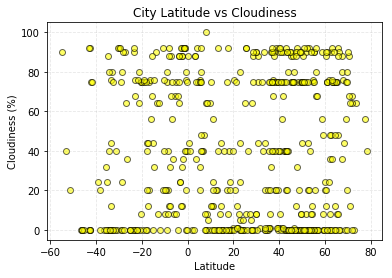

R-sq: 0.002411147908156083


LinregressResult(slope=0.053997679178667934, intercept=38.747342948855355, rvalue=0.04910344089935127, pvalue=0.2537778798247569, stderr=0.047265263329590426)

In [13]:
#Scatter Plot
plt.scatter(data_df["Latitude"],data_df["Cloudiness"], marker="o", color="yellow", edgecolors="black", alpha=0.6)
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle="--", alpha=0.3)
plt.savefig("Output/Cloud_Latitude.png")
plt.show()

#LinearReg
slope_tem, intercept_tem, r_value_tem, p_value_tem, std_err_tem = stats.linregress(data_df["Latitude"],data_df["Cloudiness"])
print(f"R-sq: {r_value_tem*r_value_tem}")
stats.linregress(data_df["Latitude"],data_df["Cloudiness"])

#### Latitude vs. Wind Speed Plot

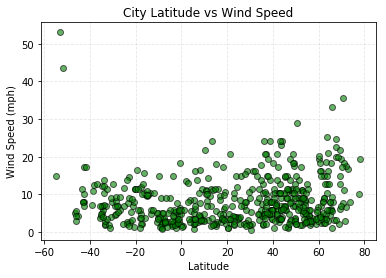

R-sq: 0.016044003258998525


LinregressResult(slope=0.023693134550525664, intercept=7.491916296597169, rvalue=0.1266649251331975, pvalue=0.003137138558195172, stderr=0.00798467251347961)

In [12]:
#Scatter Plot
plt.scatter(data_df["Latitude"],data_df["Wind Speed"], marker="o", color="green", edgecolors="black", alpha=0.6)
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(linestyle="--", alpha=0.3)
plt.savefig("Output/Wind_Latitude.png")
plt.show()

#LinearReg
slope_tem, intercept_tem, r_value_tem, p_value_tem, std_err_tem = stats.linregress(data_df["Latitude"],data_df["Wind Speed"])
print(f"R-sq: {r_value_tem*r_value_tem}")
stats.linregress(data_df["Latitude"],data_df["Wind Speed"])

In [11]:
# A N A L Y S I S

# 1. Based on the ANOVA (pvalue) there a stong correlation between Temperature
# of the city and the latitude they're in.

# 2. Data on Wind Speed and Cloudiness do not have any correlation to 
# Latitude.

# 3. All the data did not have a good r-sq value. This means that whether 
# the correlations of different factors with Latitude are significant or 
# not, the data obtained are not enough or reliable enough to used for
# prediction of certain factors. 